In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
sample = mnist.train.images[1].reshape(28,28)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

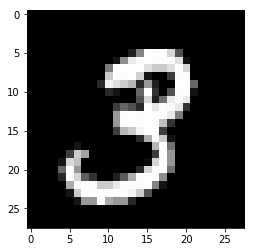

In [5]:
plt.imshow(sample,cmap='gist_gray')

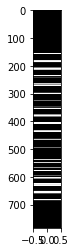

In [6]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.01)

In [7]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [8]:
W = tf.Variable(tf.zeros([784,10]))

In [9]:
b = tf.Variable(tf.zeros([10]))

In [10]:
y = tf.matmul(x,W) + b

In [11]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [12]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [13]:
optimazer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [14]:
train = optimazer.minimize(cross_entropy)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x: batch_x, y_true: batch_y})
    
    matches = tf.equal(tf.arg_max(y,1),tf.arg_max(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(
        sess.run(acc,
                 feed_dict = {x:mnist.test.images,y_true:mnist.test.labels}))

Instructions for updating:
Use `argmax` instead
0.9179
